In [14]:
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
from keras.callbacks import History
import matplotlib.pyplot as plt
import os
from tensorflow.keras.optimizers import Adam
from plain_neural_network import*

In [15]:
img_size = (1200, 480)
num_classes = 3
input_dir_X = "/work/ollie/bpanthi/nn_interpolation_new/"
weight_path = "/work/ollie/bpanthi/NN_weights"

preds_y = using_model(img_size, num_classes, input_dir_X, weight_path)
print(preds_y.shape)

2022-04-27 02:44:09.638441: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 7568640000 exceeds 10% of free system memory.


(1095, 1200, 480)


In [16]:
input_dir = "/home/ollie/ssunar/segmentation_masks_3_years"
input_file_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
    ])
test_y = xr.open_dataset(input_file_paths[0])
test_y = test_y.seg_mask.to_numpy()
test_y = np.float32(test_y)
print(test_y.shape)

(31, 1200, 480)


In [17]:
data_y = test_y
unique, counts = np.unique(data_y, return_counts=True)
print(dict(zip(unique, counts)))

freq = [np.sum(counts)/j for j in counts]
weightsSeg = [f/np.sum(freq) for f in freq]
print(weightsSeg)
weight_train = weightsSeg

{0.0: 16213254, 1.0: 837240, 2.0: 805506}
[0.024695530409275756, 0.4782319373062823, 0.4970725322844421]


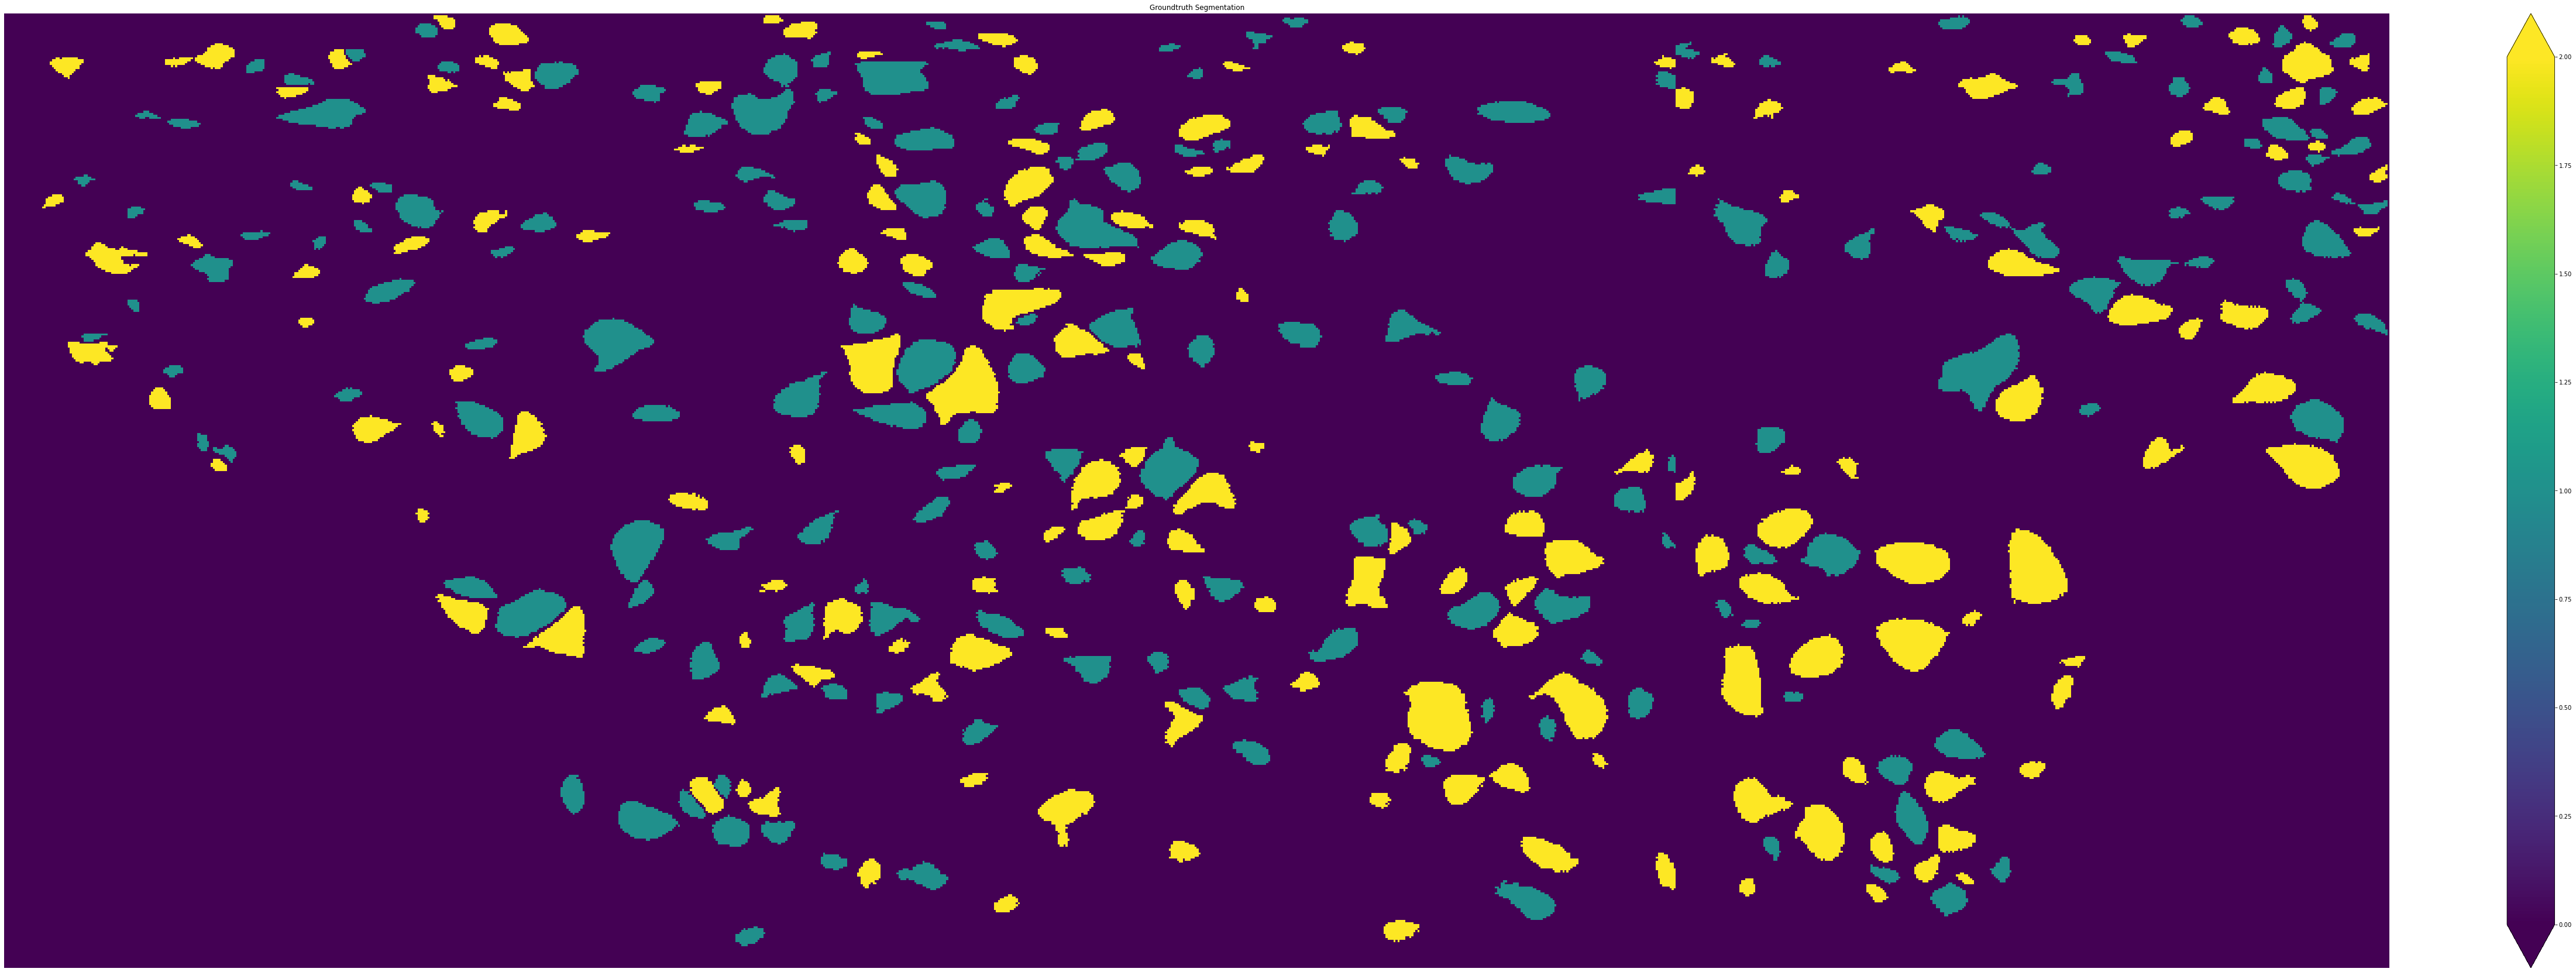

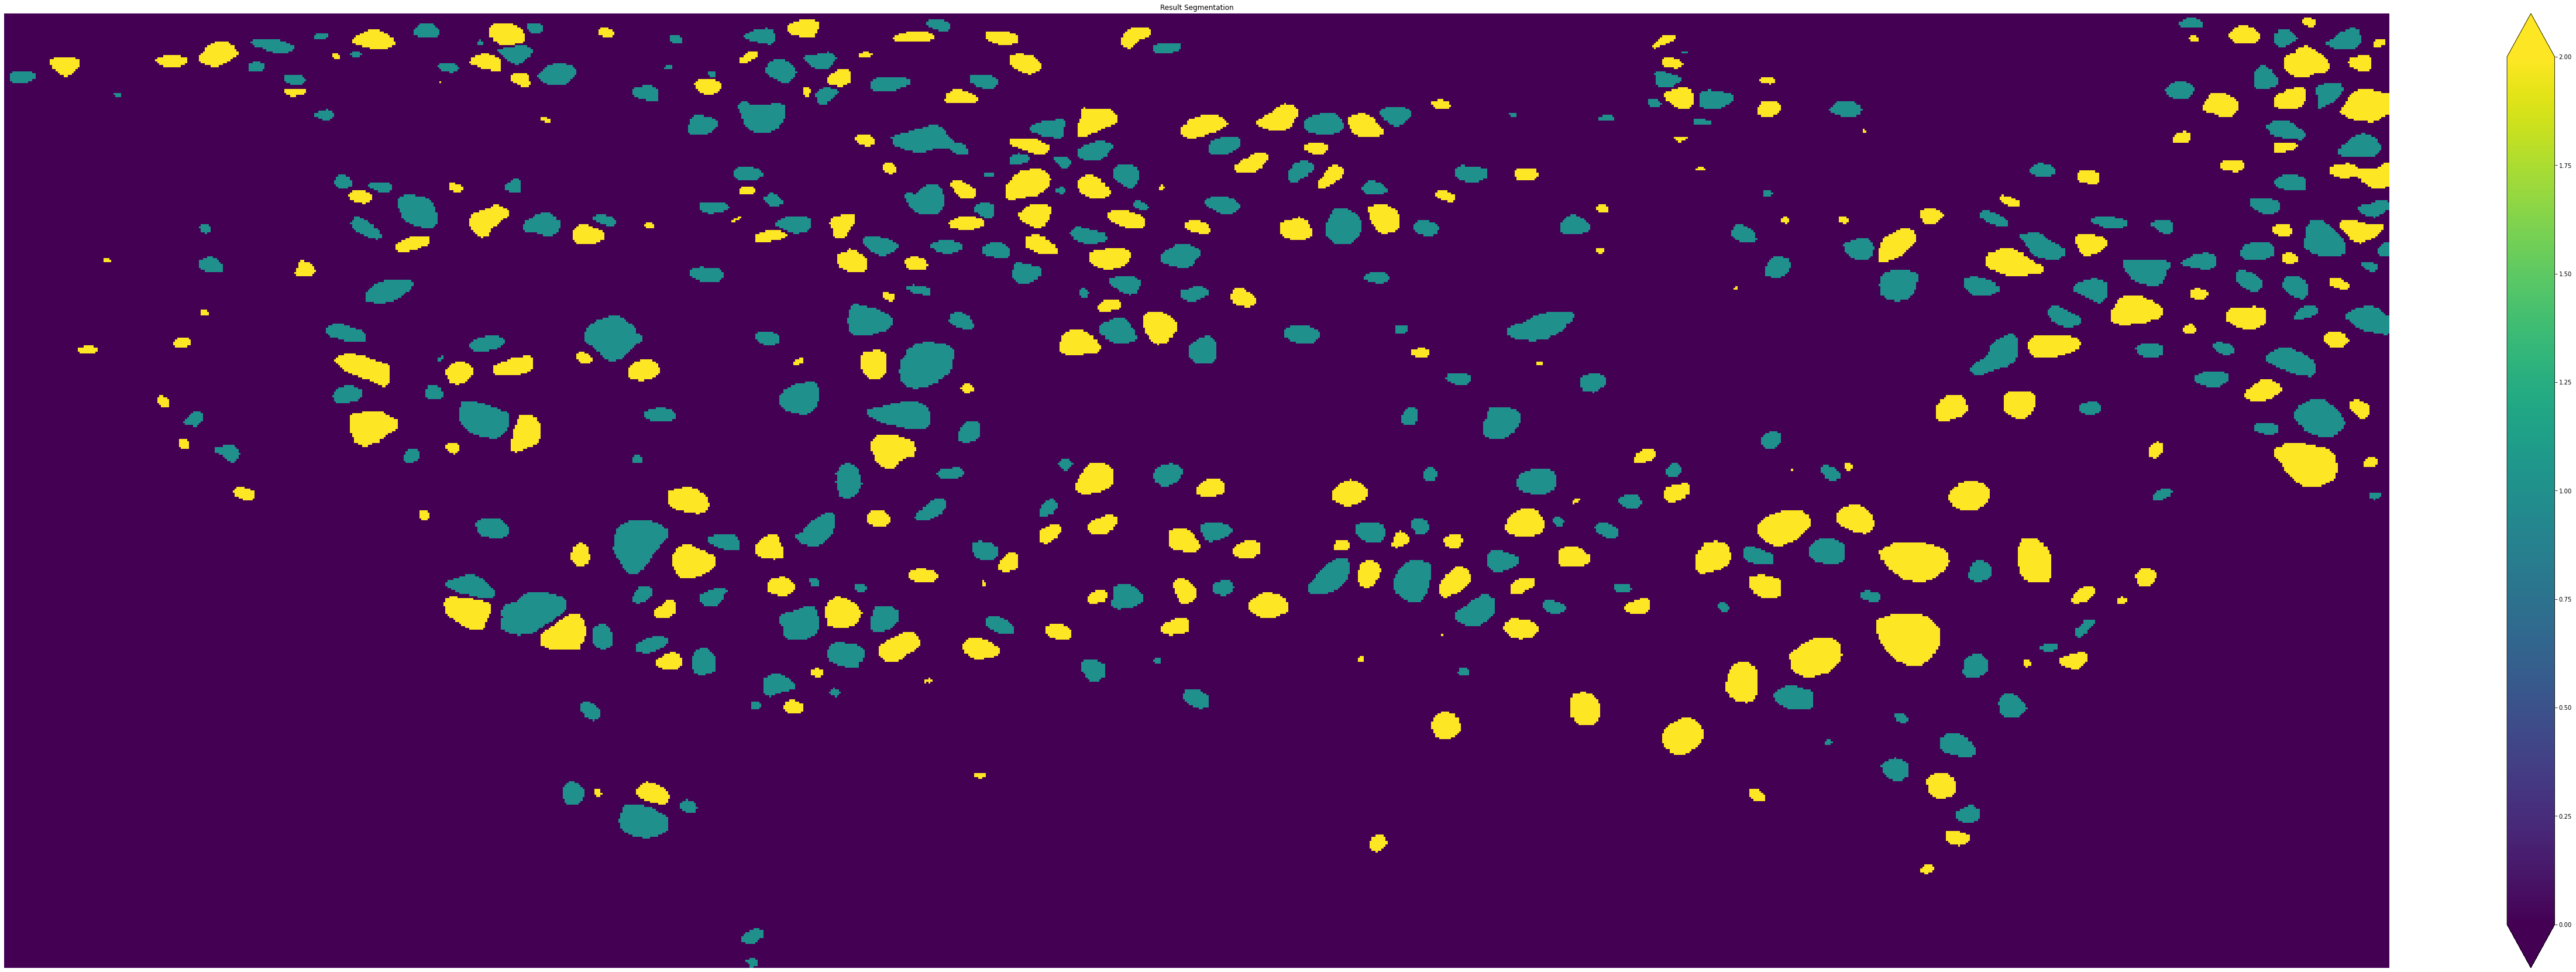

In [18]:
fig = plt.figure(figsize=(90, 30))

#plt.subplot(131)
plt.imshow(test_y[20].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Groundtruth Segmentation');

fig = plt.figure(figsize=(90, 30))
#plt.subplot(132)
plt.imshow(preds_y[20].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Result Segmentation');

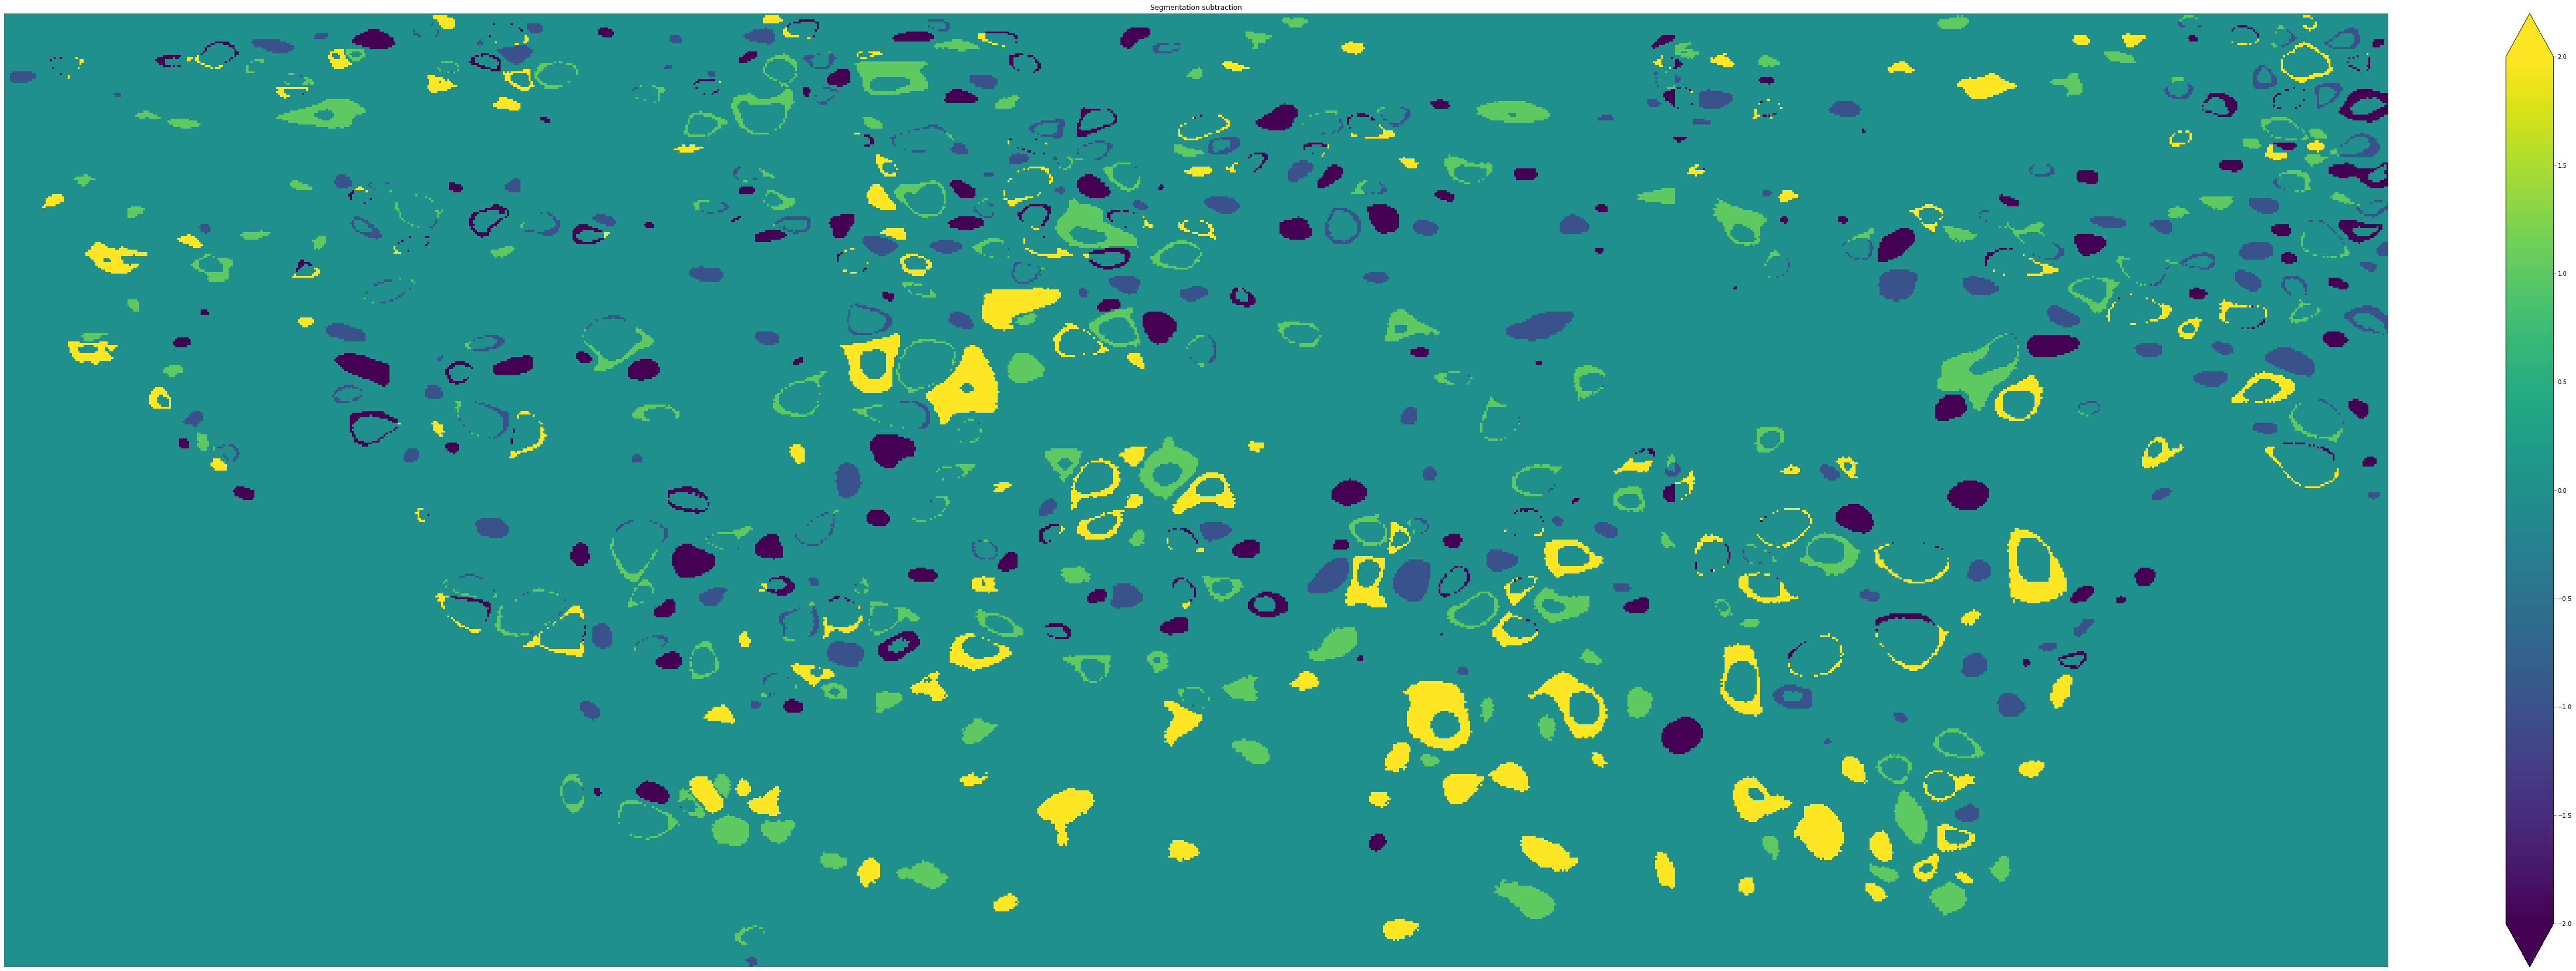

In [19]:
fig = plt.figure(figsize=(90, 30))
plt.imshow(test_y[20].T-preds_y[20].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Segmentation subtraction');
fig.savefig(('/home/ollie/bpanthi/Segmentation_subtraction.png'),dpi=100,format='png')

In [20]:
img_size = (480,192)
num_classes = 3
input_dir_X = "/work/ollie/bpanthi/test_NN/"
weight_path = "/work/ollie/bpanthi/NN_weights"

preds_y = using_model(img_size, num_classes, input_dir_X, weight_path)
print(preds_y.shape)

(31, 480, 192)


In [21]:
input_dir = "/home/ollie/ssunar/segmentation_masks_test"
input_file_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
    ])
test_y = xr.open_dataset(input_file_paths[0])
test_y = test_y.seg_mask.to_numpy()
test_y = np.float32(test_y)
print(test_y.shape)

(31, 480, 192)


In [22]:
data_y = test_y
unique, counts = np.unique(data_y, return_counts=True)
print(dict(zip(unique, counts)))

freq = [np.sum(counts)/j for j in counts]
weightsSeg = [f/np.sum(freq) for f in freq]
print("mediterranean region:", weightsSeg)
weight_med = weightsSeg

{0.0: 2746723, 1.0: 71045, 2.0: 39192}
mediterranean region: [0.009111990707332306, 0.3522853747852194, 0.6386026345074483]


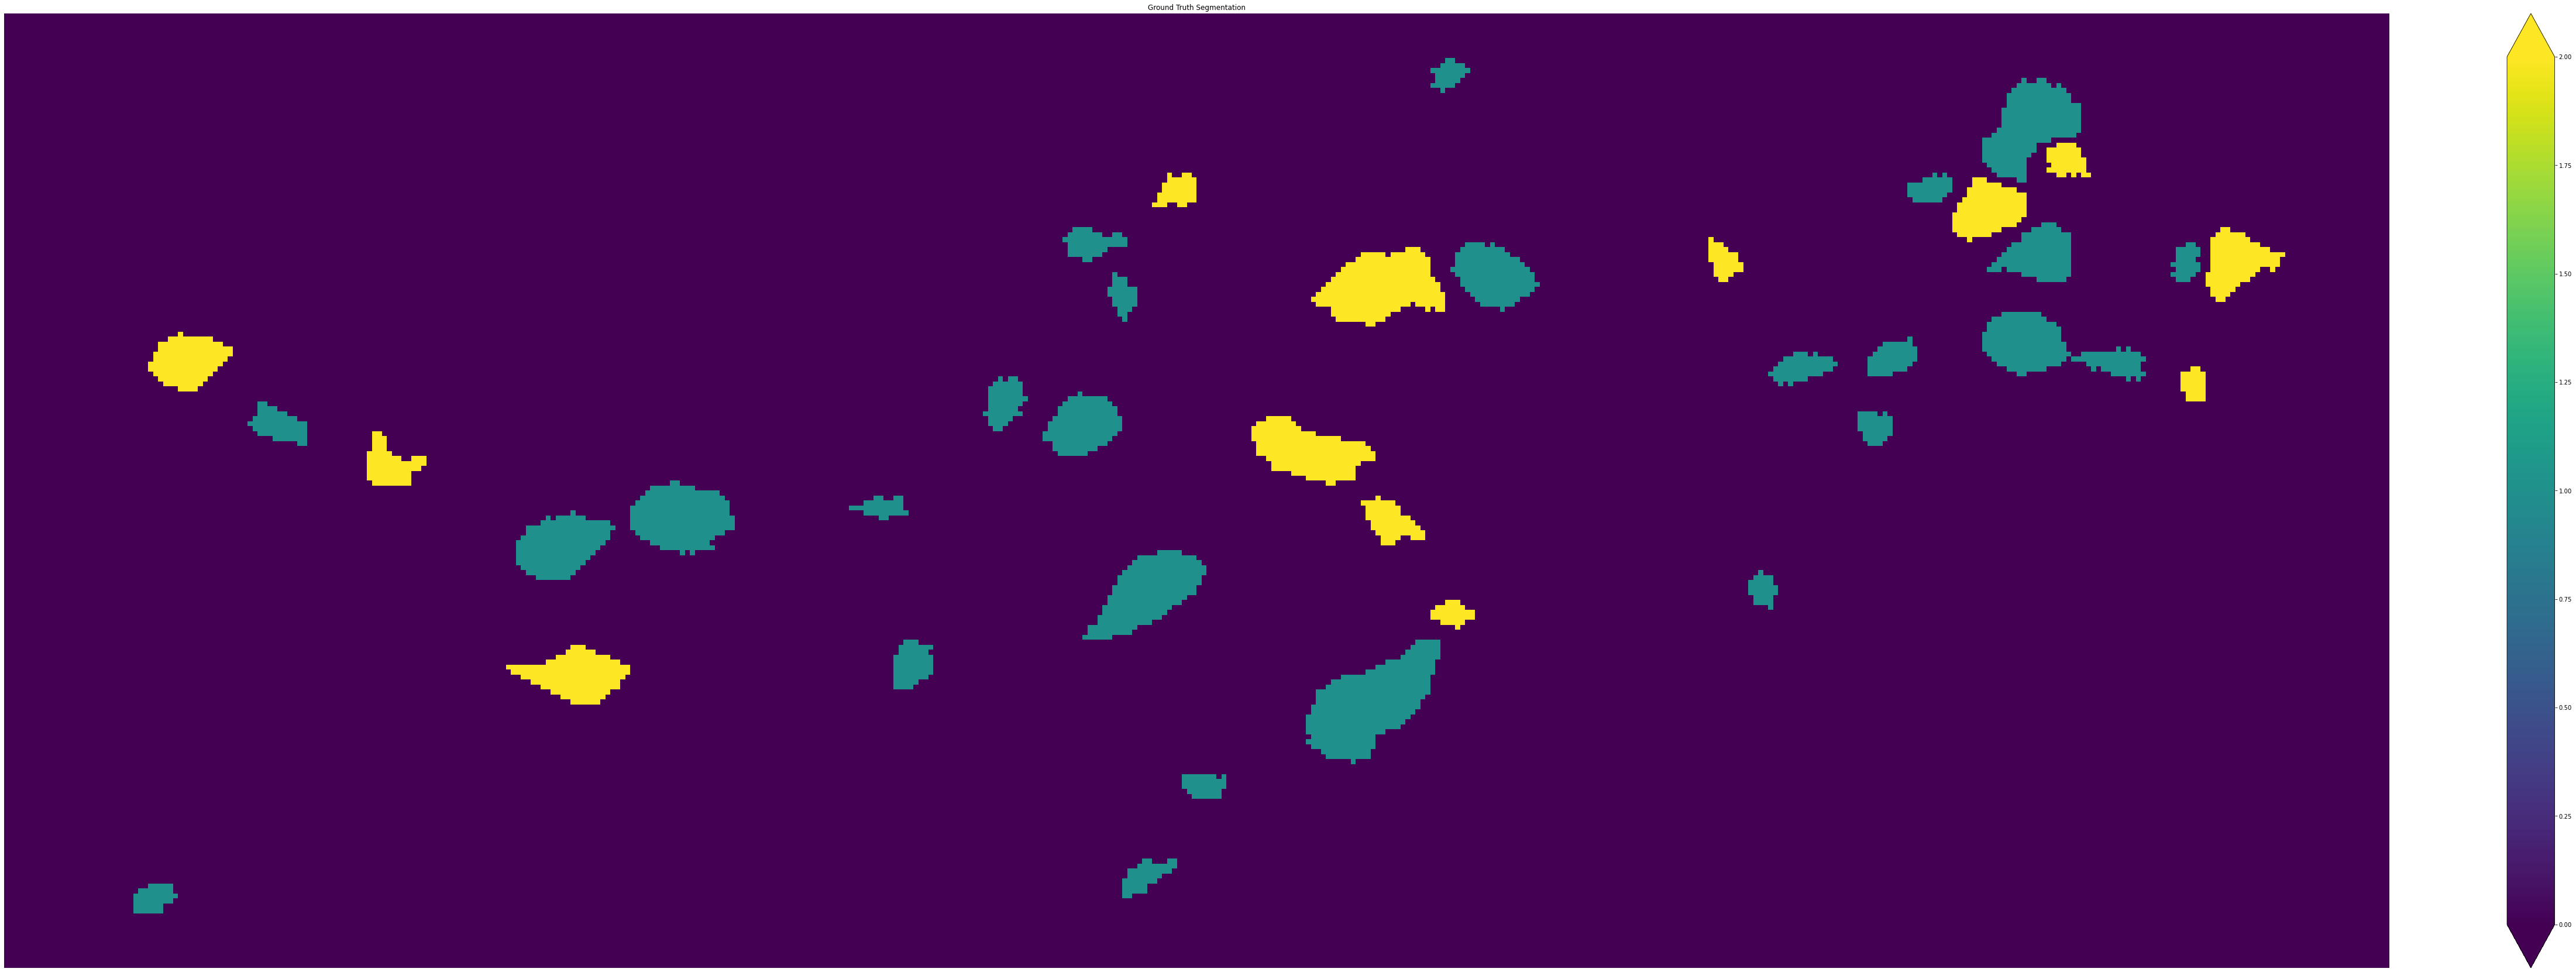

In [23]:
plt.figure(figsize=(90, 30))
plt.imshow(test_y[10].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Ground Truth Segmentation');

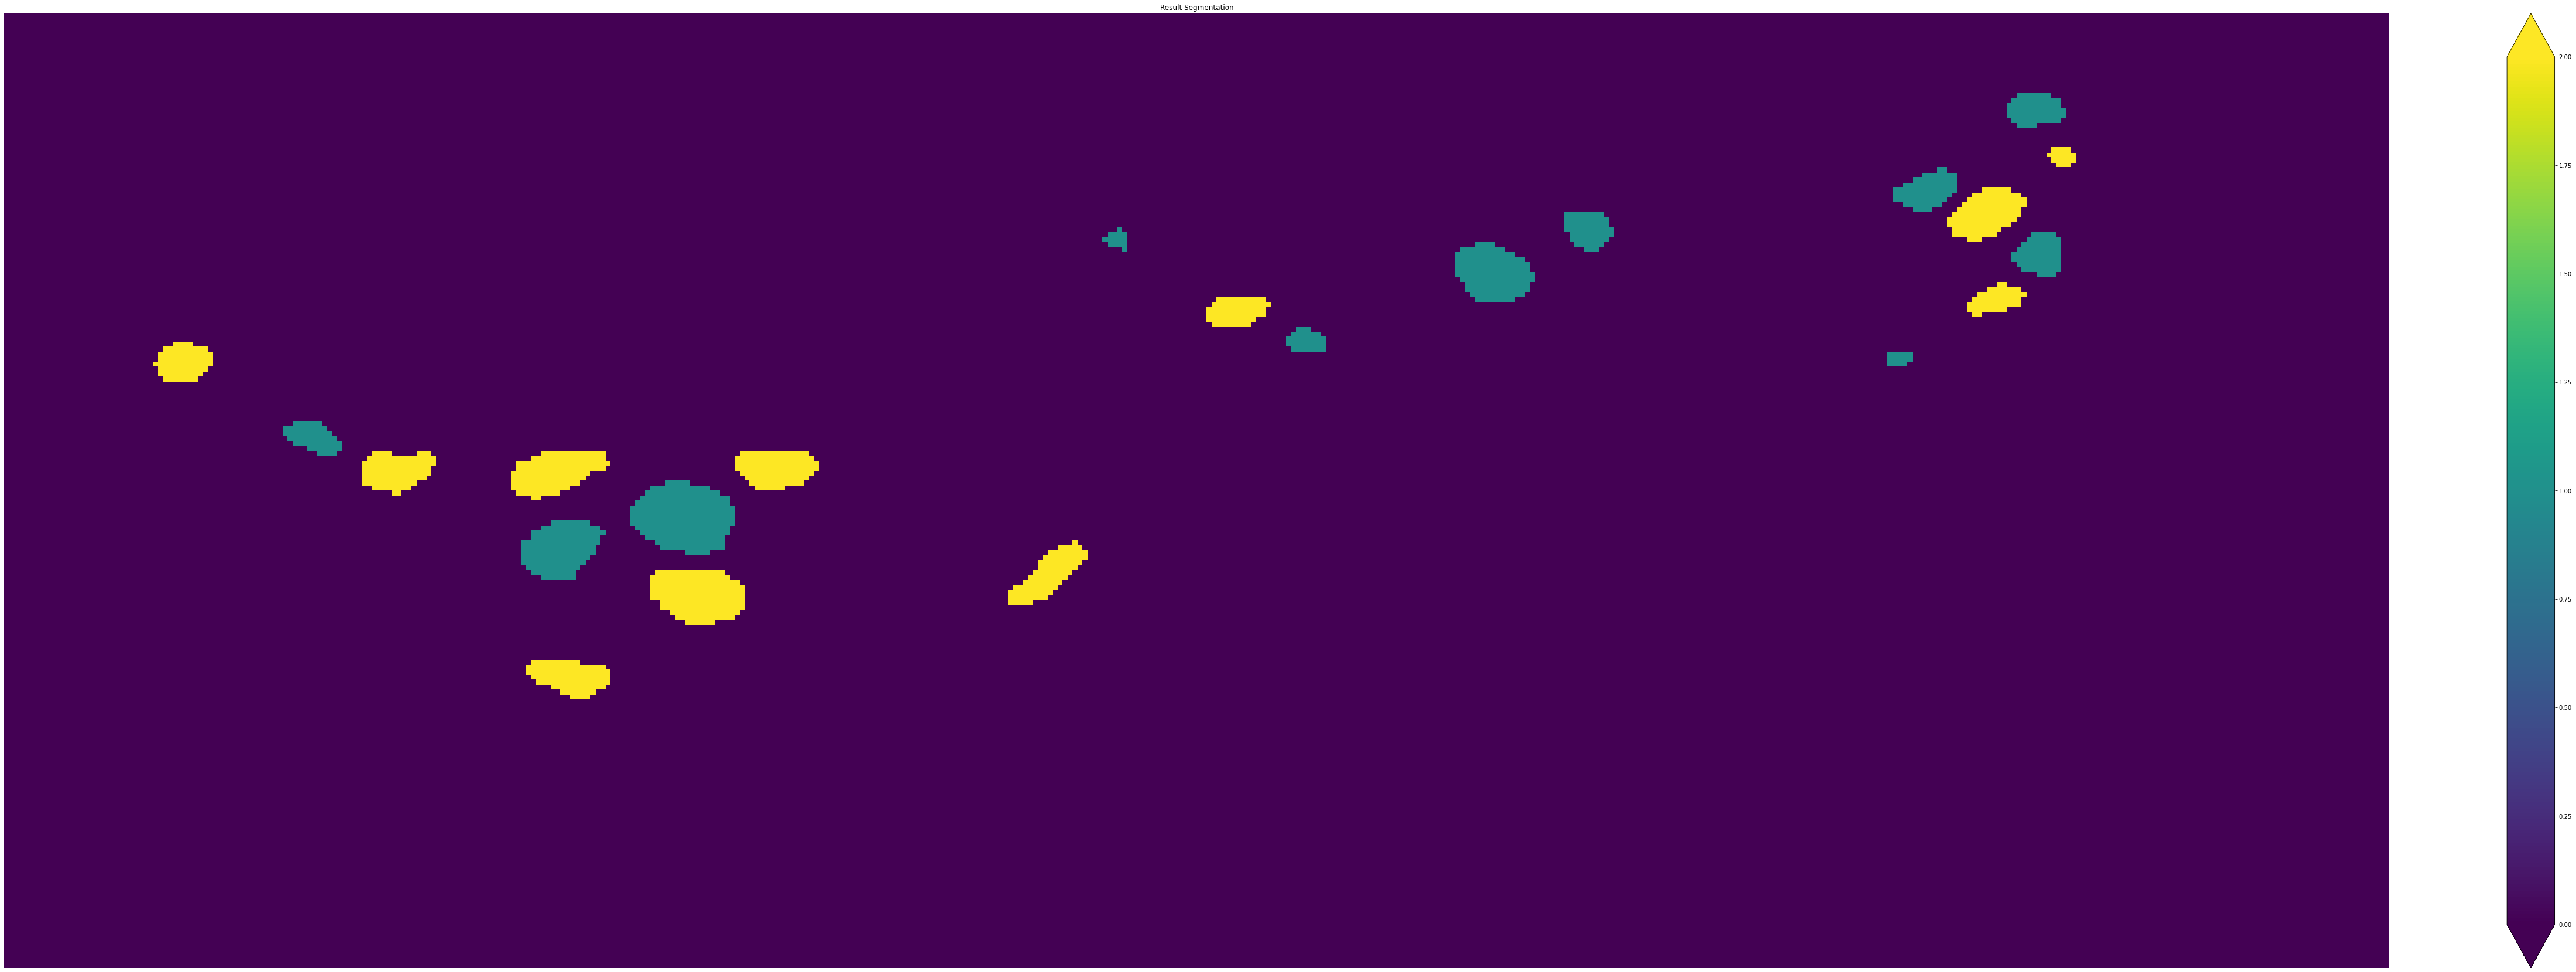

In [24]:
plt.figure(figsize=(90, 30))
plt.imshow(preds_y[10].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Result Segmentation');

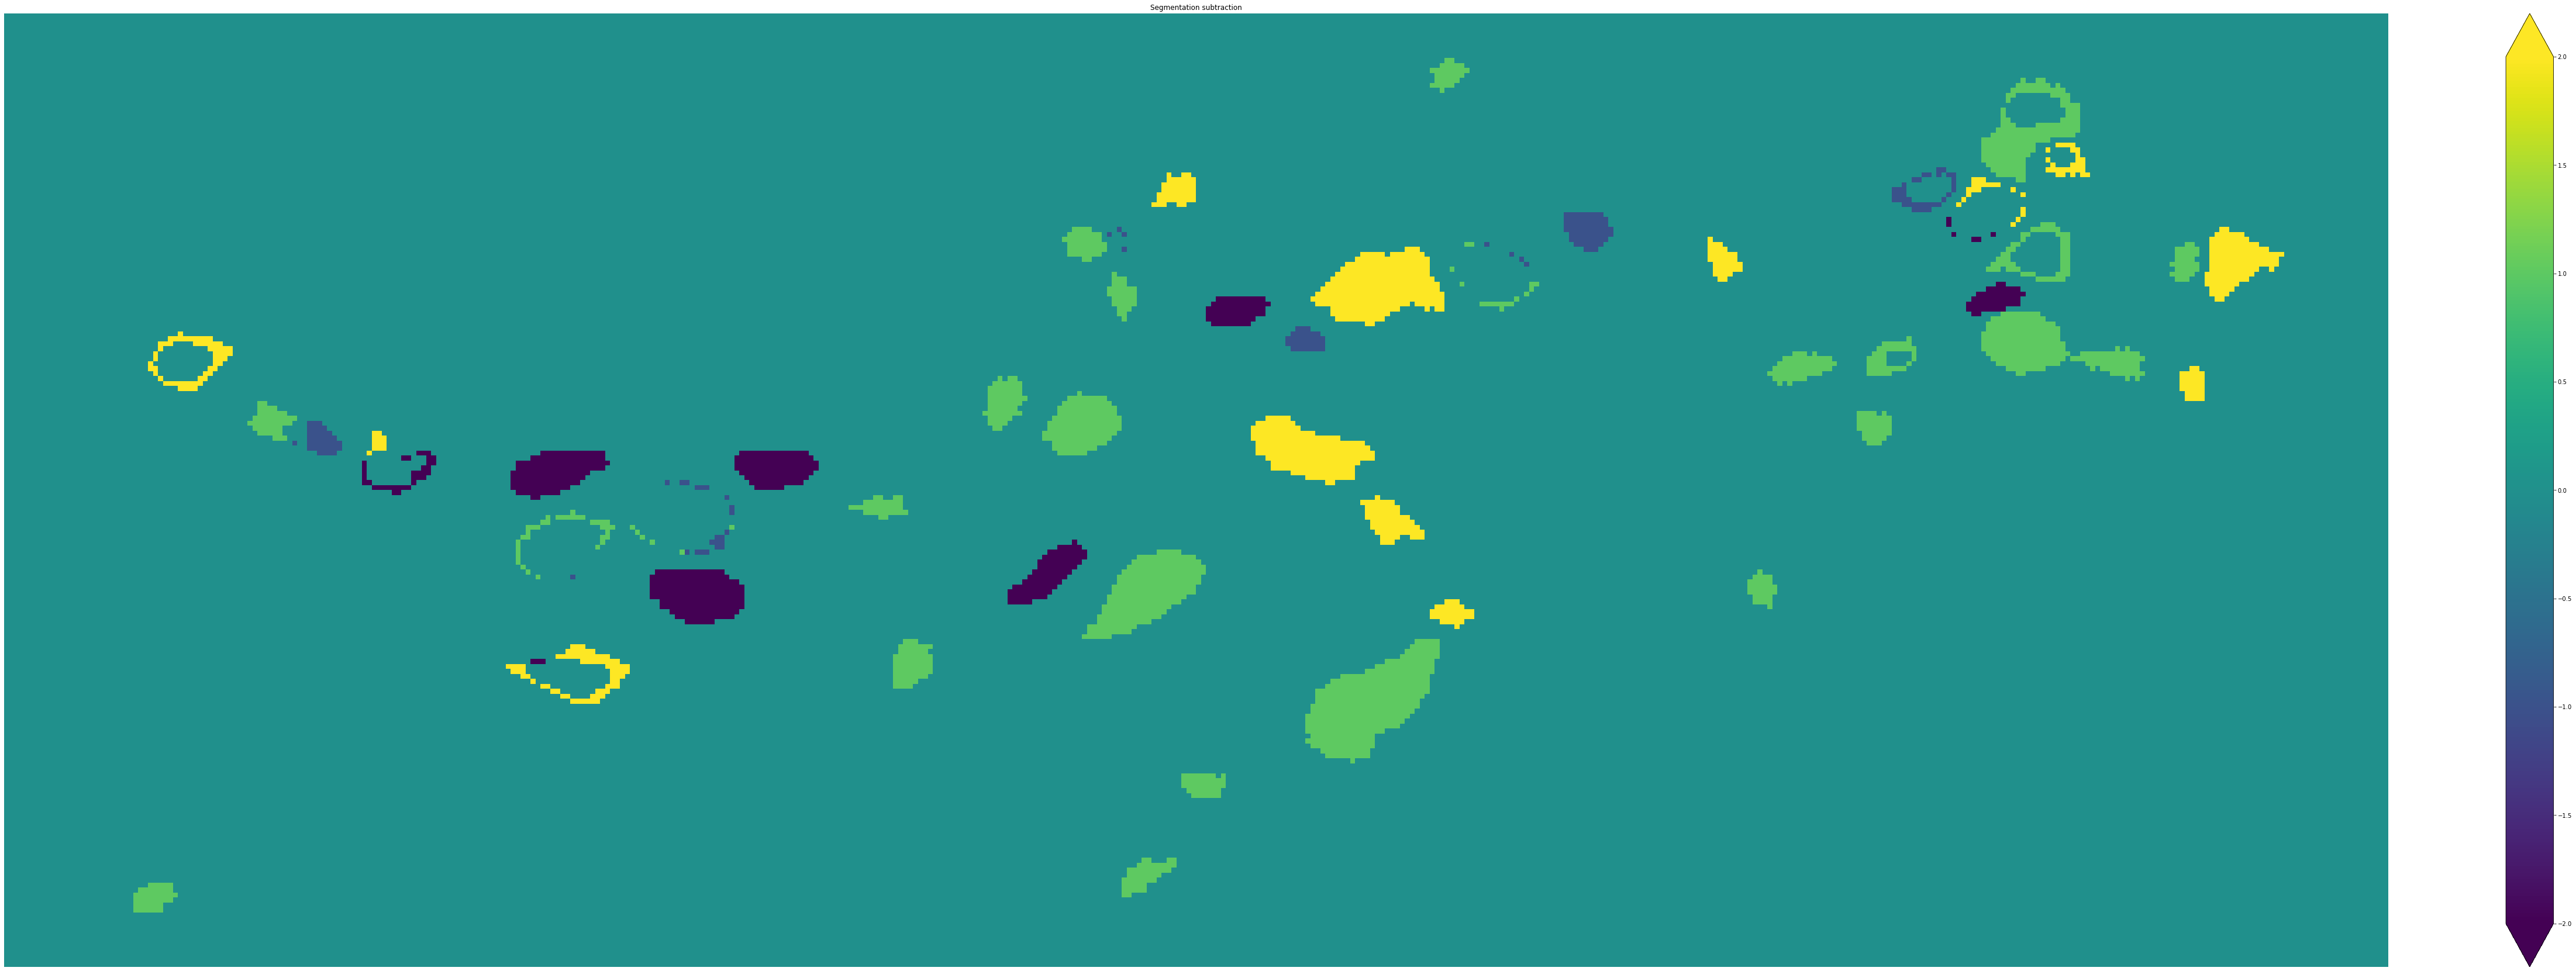

In [25]:
plt.figure(figsize=(90, 30))
plt.imshow(test_y[10].T-preds_y[10].T, cmap='viridis')
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.axis('off')
plt.title('Segmentation subtraction');